# 05-02 여러가지 유사도 기법


출처:https://wikidocs.net/24654


## 1. 유클리드 거리(Euclidean distance)

다차원 공간이라고 가정하면, 처음 보는 입장에서는 식이 너무 복잡해보입니다. 좀 더 쉽게 이해하기위해서 2차원 공간이라고 가정하고 두 점 사이의 거리를 좌표 평면 상에서 시각화해보겠습니다.


In [1]:
from IPython.display import Image

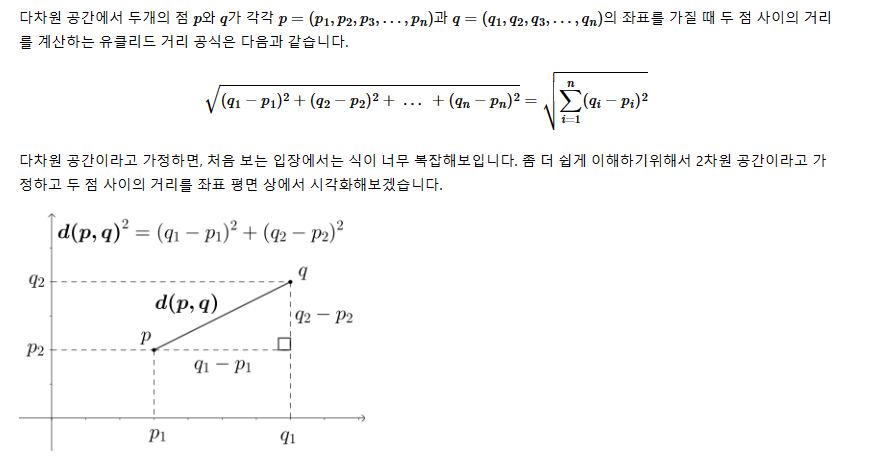

In [2]:
Image("image/Euclidean distance.png")

2차원 좌표 평면 상에서 두 점 p와 q사이의 직선 거리를 구하는 문제입니다. 위의 경우에는 직각 삼각형으로 표현이 가능하므로, 중학교 수학 과정인 피타고라스의 정리를 통해 p와q 사이의 거리를 계산할 수 있습니다. 즉, 2차원 좌표 평면에서 두 점 사이의 유클리드 거리 공식은 피타고라스의 정리를 통해 두 점 사이의 거리를 구하는 것과 동일합니다.

다시 원점으로 돌아가서 여러 문서에 대해서 유사도를 구하고자 유클리드 거리 공식을 사용한다는 것은, 앞서 본 2차원을 단어의 총 개수만큼의 차원으로 확장하는 것과 같습니다. 예를 들어 아래와 같은 DTM이 있다고 합시다.

      /바나나 /사과 /저는 /좋아요

문서1 / 2_____   /3_____/0____/1____ 

문서2 / 1____/ 2____ / 3____ / 1____  

문서3 /  2____/ 1____ / 2____ / 2____

단어의 개수가 4개이므로, 이는 4차원 공간에 문서1, 문서2, 문서3을 배치하는 것과 같습니다. 이때 다음과 같은 문서Q에 대해서 문서1, 문서2, 문서3 중 가장 유사한 문서를 찾아내고자 합니다.

      /바나나	/사과	/저는 /좋아요

문서1 / 1_____   / 1_____/ 0____/ 1____

이때 유클리드 거리를 통해 유사도를 구하려고 한다면, 문서Q 또한 다른 문서들처럼 4차원 공간에 배치시켰다는 관점에서 4차원 공간에서의 각각의 문서들과의 유클리드 거리를 구하면 됩니다. 이를 파이썬 코드로 구현해보겠습니다.

In [3]:
import numpy as np

def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


유클리드 거리의 값이 가장 작다는 것은 문서 간 거리가 가장 가깝다는 것을 의미합니다. 즉, 문서1이 문서Q와 가장 유사하다고 볼 수 있습니다.


## 2. 자카드 유사도(Jaccard similarity)


A와 B 두개의 집합이 있다고 합시다. 이때 교집합은 두 개의 집합에서 공통으로 가지고 있는 원소들의 집합을 말합니다. 즉, 합집합에서 교집합의 비율을 구한다면 두 집합 A와 B의 유사도를 구할 수 있다는 것이 자카드 유사도(jaccard similarity)의 아이디어입니다. 자카드 유사도는 0과 1사이의 값을 가지며, 만약 두 집합이 동일하다면 1의 값을 가지고, 두 집합의 공통 원소가 없다면 0의 값을 갖습니다. 자카드 유사도를 구하는 함수를 J라고 하였을 때, 자카드 유사도 함수 J는 아래와 같습니다.

In [4]:
from IPython.display import Image

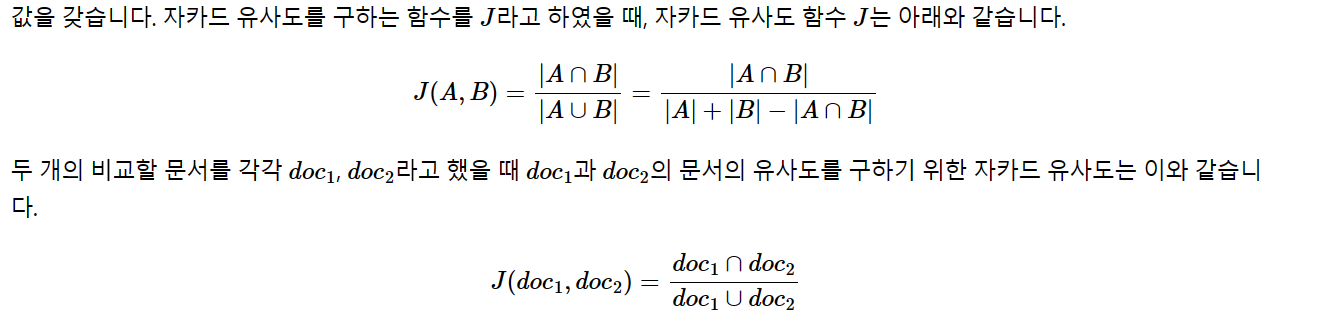

In [5]:
Image("image/Jaccard similarity.png")

In [6]:
# 두 집합의 교집합 크기 / 두 집합의 합집합 크기

# 간단한 예를 통해서 이해해보겠습니다.

doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [7]:
# 문서1과 문서2의 합집합을 구해보겠습니다.

union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :',union)

문서1과 문서2의 합집합 : {'card', 'everyone', 'love', 'apple', 'holder', 'passport', 'banana', 'likey', 'you', 'coupon', 'like', 'watch'}


In [8]:
# 문서1과 문서2의 합집합의 단어의 총 개수는 12개입니다.
# 이제 문서1과 문서2의 교집합을 구해보겠습니다.
# 문서1과 문서2에서 둘 다 등장한 단어를 찾으면 됩니다.

intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :',intersection)

문서1과 문서2의 교집합 : {'apple', 'banana'}


In [9]:
# 문서1과 문서2에서 둘 다 등장한 단어는 banana와 apple 총 2개입니다.
# 이제 교집합의 크기를 합집합의 크기로 나누면 자카드 유사도가 계산됩니다.

print('자카드 유사도 :',len(intersection)/len(union))


자카드 유사도 : 0.16666666666666666
